In [1]:
import sys
from pathlib import Path

project_root = Path.cwd().resolve().parent  # parent of notebooks/
sys.path.append(str(project_root))

from src.data_enrichment import FinancialInclusionDataEnricher

In [2]:
DATA_PATH = project_root / "data" / "raw" / "ethiopia_fi_unified_data.csv"
REFERENCE_DATA_PATH = project_root / "data" / "raw" / "reference_codes.csv"

enricher = FinancialInclusionDataEnricher(
    data_path=DATA_PATH,
    reference_path=REFERENCE_DATA_PATH
)

In [3]:
enricher.load_data()

2026-01-30 12:32:39,376 | INFO | Loading unified dataset and reference codes
2026-01-30 12:32:39,393 | INFO | Dataset loaded: 43 rows


In [4]:
enricher.summarize_dataset()

2026-01-30 12:32:39,408 | INFO | Generating dataset summary


{'record_type': record_type
 observation    30
 event          10
 target          3
 Name: count, dtype: int64,
 'pillar': pillar
 ACCESS           16
 USAGE            11
 NaN              10
 GENDER            5
 AFFORDABILITY     1
 Name: count, dtype: int64,
 'source_type': source_type
 operator      15
 survey        10
 regulator      7
 research       4
 policy         3
 calculated     2
 news           2
 Name: count, dtype: int64,
 'confidence': confidence
 high      40
 medium     3
 Name: count, dtype: int64}

In [5]:
enricher.indicator_coverage()

,min,max,count
indicator_code,,,
ACC_OWNERSHIP,2014-12-31,2024-11-29,6
ACC_FAYDA,2024-08-15,2025-05-15,3
ACC_4G_COV,2023-06-30,2025-06-30,2
ACC_MM_ACCOUNT,2021-12-31,2024-11-29,2
GEN_GAP_ACC,2021-12-31,2024-11-29,2
USG_P2P_COUNT,2024-07-07,2025-07-07,2
ACC_MOBILE_PEN,2025-12-31,2025-12-31,1
GEN_GAP_MOBILE,2024-12-31,2024-12-31,1
GEN_MM_SHARE,2024-12-31,2024-12-31,1


In [6]:
enricher.add_observations()

2026-01-30 12:32:39,479 | INFO | Added 2 new observations


In [7]:
enricher.add_events()

2026-01-30 12:32:39,491 | INFO | Added 1 new events


In [8]:
enricher.add_impact_links()

2026-01-30 12:32:39,510 | INFO | Added 2 impact links


In [ ]:
output_dir = project_root / "data" / "processed"

print (output_dir)

enricher.save_outputs(output_dir=output_dir)

C:\Users\amare\Documents\KAIM\week-10\ethiopia-fi-forecast\data\processed


' enricher.save_outputs(output_dir=output_dir) '

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(output_dir / "ethiopia_fi_enriched.csv")
obs = df[df["record_type"] == "observation"]
events = df[df["record_type"] == "event"]
links = df[df["record_type"] == "impact_link"]

### 📊 Visualization 1: Enablers vs Outcomes (WHY enrichment matters)
#### Smartphone & Internet vs Digital Payments

In [17]:
import os

FIG_DIR = project_root / "reports" /"figures"
os.makedirs(FIG_DIR, exist_ok=True)


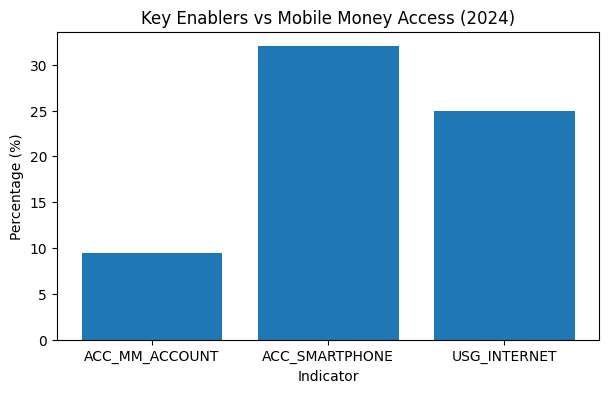

In [18]:
enablers = obs[obs["indicator_code"].isin([
    "ACC_SMARTPHONE",
    "USG_INTERNET",
    "ACC_MM_ACCOUNT"
])]

plt.figure(figsize=(7,4))
plt.bar(enablers["indicator_code"], enablers["value_numeric"])
plt.title("Key Enablers vs Mobile Money Access (2024)")
plt.ylabel("Percentage (%)")
plt.xlabel("Indicator")

plt.savefig(
    f"{FIG_DIR}/fig_01_enablers_vs_mobile_money_access.png",
    dpi=300
)
plt.show()


### 📊 Visualization 2: Enrichment Filling Data Gaps
#### Observation Coverage Before vs After Enrichment

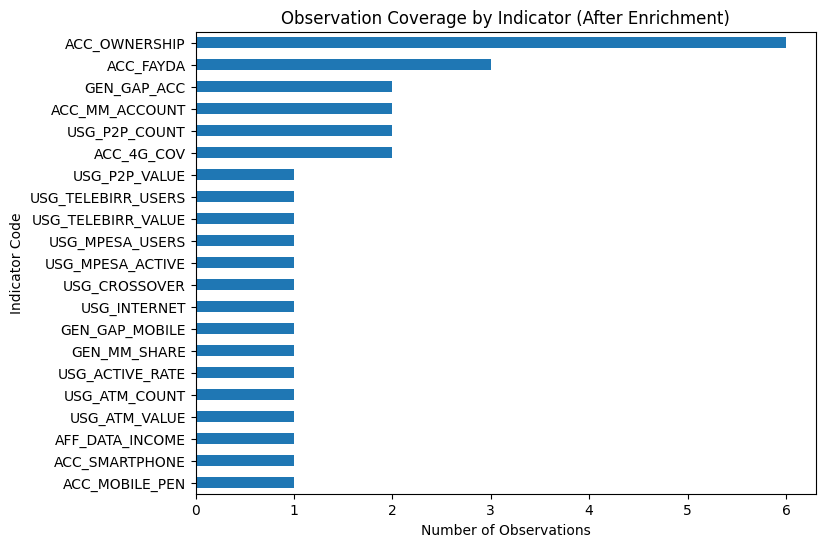

In [19]:
coverage = obs.groupby("indicator_code")["observation_date"].count().sort_values()

plt.figure(figsize=(8,6))
coverage.plot(kind="barh")
plt.title("Observation Coverage by Indicator (After Enrichment)")
plt.xlabel("Number of Observations")
plt.ylabel("Indicator Code")
plt.savefig(
    f"{FIG_DIR}/fig_02_indicator_coverage_after_enrichment.png",
    dpi=300
)
plt.show()


### 📊 Visualization 3: Event Timeline with Enriched Event Highlighted
#### Agent Banking Regulation in Context

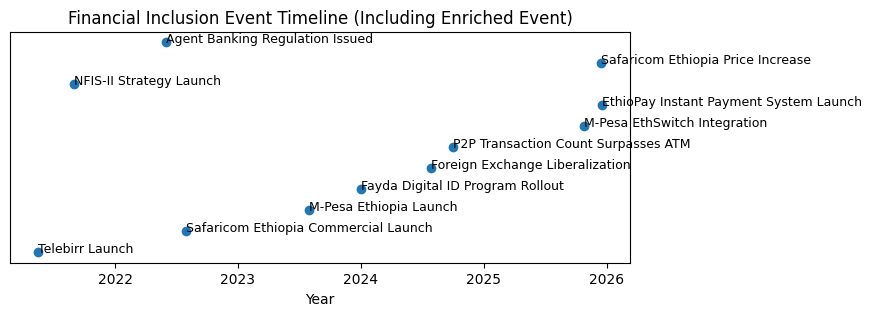

In [20]:
timeline = events[["indicator", "observation_date"]].copy()
timeline["observation_date"] = pd.to_datetime(timeline["observation_date"])

plt.figure(figsize=(8,3))
plt.scatter(
    timeline["observation_date"],
    range(len(timeline)),
    marker="o"
)

for i, label in enumerate(timeline["indicator"]):
    plt.text(timeline["observation_date"].iloc[i], i, label, fontsize=9)

plt.title("Financial Inclusion Event Timeline (Including Enriched Event)")
plt.yticks([])
plt.xlabel("Year")
plt.savefig(f"{FIG_DIR}/fig_03_event_timeline.png", dpi=300)

plt.show()


### 📊Visualization 4: Impact Links Added (Cause → Effect)
#### Event → Indicator Mapping

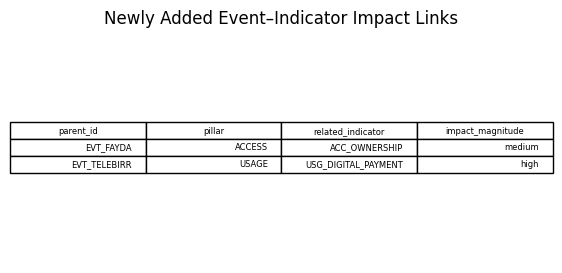

In [21]:
impact_map = links[["parent_id", "pillar", "related_indicator", "impact_magnitude"]]

plt.figure(figsize=(7,3))
plt.table(
    cellText=impact_map.values,
    colLabels=impact_map.columns,
    loc="center"
)
plt.axis("off")
plt.title("Newly Added Event–Indicator Impact Links")
plt.savefig(f"{FIG_DIR}/fig_04_event_indicator_links.png", dpi=300)

plt.show()
